In [3]:
%matplotlib inline

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr
import glob
import matplotlib.colors as colors
import metpy.calc as mpcalc
from metpy.units import units

from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo

from IPython.display import display,clear_output
import os
from datetime import datetime

# AOSPSAP3W1

In [3]:
ds1 = xr.open_dataset(r"C:\Users\Reese\Desktop\AOS Proj Data\psap\enaaospsap3w1mC1.b1.20190303.000030.nc")
dsA = xr.concat([xr.open_dataset(f) for f in glob.glob(r"C:\Users\Reese\Desktop\AOS Proj Data\psap\*.nc")], dim='time')
dsA

<xarray.Dataset>
Dimensions:                 (bound: 2, time: 41760)
Coordinates:
  * time                    (time) datetime64[ns] 2019-03-03T00:00:30 ... 201...
Dimensions without coordinates: bound
Data variables: (12/30)
    base_time               (time) datetime64[ns] 2019-03-03 ... 2019-03-31
    time_offset             (time) datetime64[ns] 2019-03-03T00:00:30 ... 201...
    time_bounds             (time, bound) datetime64[ns] 2019-03-03 ... 2019-...
    sample_volume           (time) float32 1.125 1.125 1.125 ... 1.144 1.144
    qc_sample_volume        (time) int32 0 0 0 0 0 0 0 17 0 ... 0 0 0 0 0 0 0 0
    transmittance_blue      (time) float32 0.9187 0.9186 ... 0.9831 0.9829
    ...                      ...
    qc_sample_flow_rate     (time) int32 0 0 0 0 0 0 0 1 0 ... 0 0 0 0 0 0 0 0 0
    spot_size_area          (time) float32 17.5 17.5 17.5 ... 17.5 17.5 17.5
    impactor_state          (time) float64 10.0 10.0 10.0 ... 10.0 10.0 10.0
    lat                     (time) float32 39.09 39.09 39.09 ... 39.09 39.09
    lon                     (time) float32 -28.03 -28.03 ... -28.03 -28.03
    alt                     (time) float32 30.48 30.48 30.48 ... 30.48 30.48
Attributes: (12/19)
    command_line:             aospsap3w1m -s ena -f C1
    Conventions:              ARM-1.2
    process_version:          ingest-aospsap3w1m-1.1-0.el6
    dod_version:              aospsap3w1m-b1-1.1
    site_id:                  ena
    platform_id:              aospsap3w1m
    ...                       ...
    configuration_file:       enaaospsap3w1mC1.20131201.000000.config
    PSAP_Instrument:          Particle Soot Absorption Photometer
    Instrument_Manufacturer:  Radiance Research
    AOS_DAC_type:             D
    doi:                      10.5439/1225037
    history:                  created by user dsmgr on machine ruby at 2019-0...

Text(0, 0.5, 'Unitless')

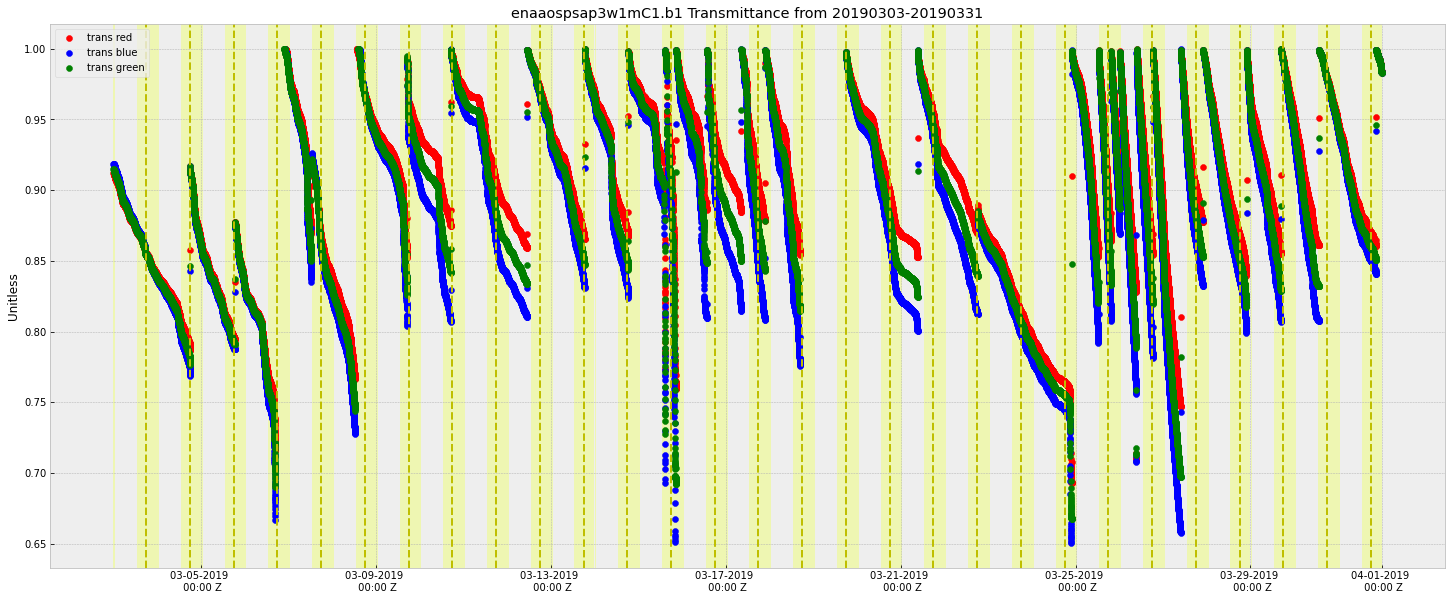

In [4]:
plt.style.use("bmh")
strt_day = 3
fig,ax = plt.subplots(1,1,figsize=(25,10))
ax.scatter(dsA['time'],dsA['transmittance_red'], color = 'red', label='trans red',zorder=2)
ax.scatter(dsA['time'],dsA['transmittance_blue'], color = 'blue', label='trans blue',zorder=2)
ax.scatter(dsA['time'],dsA['transmittance_green'], color = 'green', label='trans green',zorder=2)
ax.legend(loc='upper left')
# '{:0>2}'.format(3)
counter = strt_day
for i in range(29):
    plt.axvspan('2019-03-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-03-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvspan('2019-03-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-03-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvline('2019-03-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--')
    counter += 1
ax.set_title("enaaospsap3w1mC1.b1 Transmittance from 20190303-20190331")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax.set_ylabel('Unitless')

#Day starts at index 419 of time and ends 1139

Text(0, 0.5, '(L/min)')

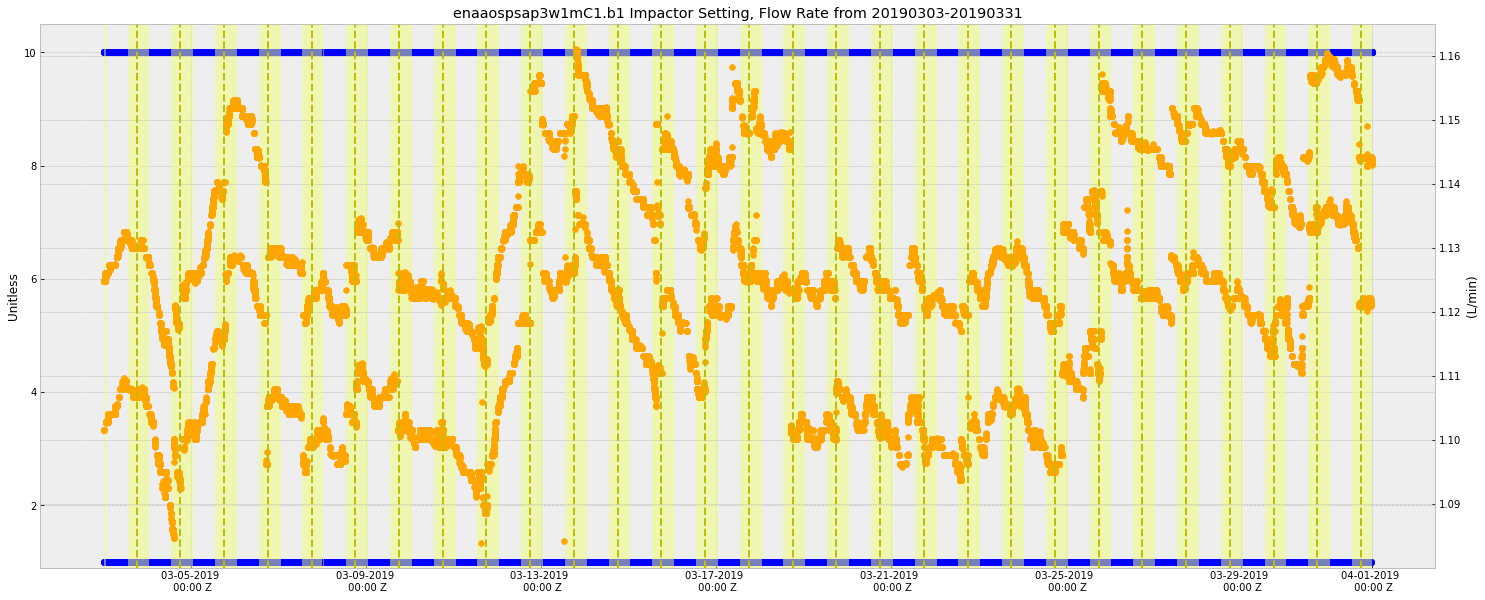

In [5]:
fig,ax1 = plt.subplots(1,1,figsize=(25,10))
ax2 = ax1.twinx()
ax1.scatter(dsA['time'],dsA['impactor_state'], color = 'blue', label='impactor',zorder=2)
ax2.scatter(dsA['time'],dsA['sample_flow_rate'], color = 'orange', label='sample_flow_rate',zorder=2)  
counter = strt_day
for i in range(29):
    plt.axvspan('2019-03-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-03-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvspan('2019-03-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-03-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvline('2019-03-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--')
    counter += 1  
ax1.set_ylim(0.9,10.5)
ax1.set_title("enaaospsap3w1mC1.b1 Impactor Setting, Flow Rate from 20190303-20190331")
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax1.set_ylabel('Unitless', color='black')
ax2.set_ylabel('(L/min)', color='black')

I'm trying to see why we might be seeing two different sampe flow rate lines but it looks like its the oscilation line. These do seem like very high values when I comepare with the current Houston instrument.

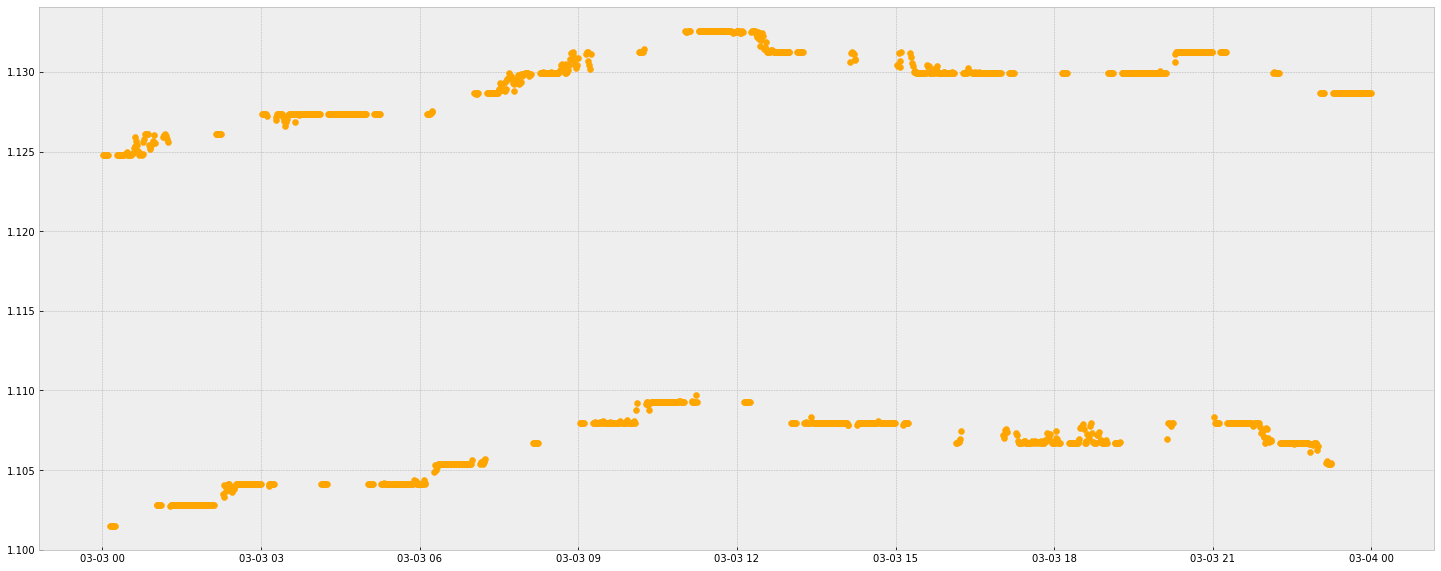

In [150]:
fig,ax1 = plt.subplots(1,1,figsize=(25,10))
ax1.scatter(ds1['time'],ds1['sample_flow_rate'], color = 'orange', label='sample_flow_rate',zorder=2) 

Okay, so it seems that we are seeing two lines are based on the impactor oscillation, so in the full mnth it just seems like two lines because of how closely spaced the data points have to be.

# Creating dataset of SGP aossmps

In [2]:
dsA2 = xr.concat([xr.open_dataset(f) for f in glob.glob(r"C:\Users\Reese\Desktop\AOS Proj Data\aossmps\*.nc")], dim='time')
dsA2

<xarray.Dataset>
Dimensions:                                     (bound: 2, diameter_mobility: 192, time: 8902)
Coordinates:
  * time                                        (time) datetime64[ns] 2019-05...
  * diameter_mobility                           (diameter_mobility) float32 1...
Dimensions without coordinates: bound
Data variables: (12/50)
    base_time                                   (time) datetime64[ns] 2019-05...
    time_offset                                 (time) datetime64[ns] 2019-05...
    time_bounds                                 (time, bound) datetime64[ns] ...
    diameter_mobility_bounds                    (time, diameter_mobility, bound) float32 ...
    lower_size                                  (time) float32 11.1 ... 11.1
    dN_dlogDp                                   (time, diameter_mobility) float32 ...
    ...                                          ...
    DMA_inner_radius                            (time) float64 0.937 ... 0.937
    DMA_outer_radius                            (time) float64 1.961 ... 1.961
    DMA_characteristic_length                   (time) float64 44.37 ... 44.37
    lat                                         (time) float32 36.6 ... 36.6
    lon                                         (time) float32 -97.49 ... -97.49
    alt                                         (time) float32 318.0 ... 318.0
Attributes: (12/29)
    command_line:                 aossmpscorr -s sgp -f E13
    Conventions:                  ARM-1.2
    process_version:              ingest-aossmpscorr-1.1-0.el7
    dod_version:                  aossmps-b1-2.1
    site_id:                      sgp
    platform_id:                  aossmps
    ...                           ...
    classifier_serial_number:     3082001529004
    channels_per_decade:          64
    instrument_output_units:      dw/dlogDp
    instrument_output_weighting:  Number
    doi:                          10.5439/1476898
    history:                      created by user dsmgr on machine zinc at 20...

## Number, SA, Vol. Concentration Plots

Text(0, 0.5, 'nm$^{2}$cm$^{3}$')

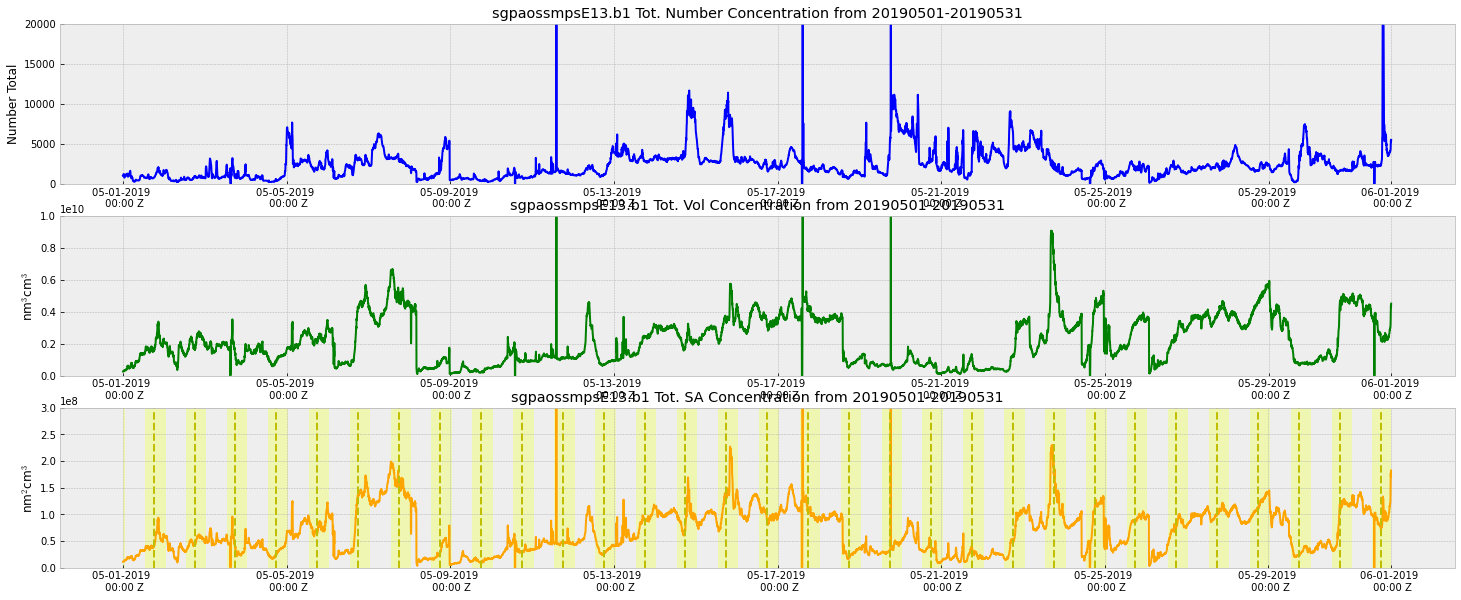

In [7]:
#dsA2['total_N_conc'].plot()
#Number concentration
fig, (ax,ax1,ax2) = plt.subplots(3,1,figsize=(25,10))
counter = 1
ax.plot(dsA2['time'],dsA2['total_N_conc'], color = 'blue', label='total_N_conc',zorder=2)

ax.set_ylim([-5,20000])
ax.set_title("sgpaossmpsE13.b1 Tot. Number Concentration from 20190501-20190531")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax.set_ylabel('Number Total')
#Volume concentration
counter = 1
ax1.plot(dsA2['time'],dsA2['total_V_conc'], color = 'green', label='total_V_conc',zorder=2)

ax1.set_ylim([-5,1.0e10])
ax1.set_title("sgpaossmpsE13.b1 Tot. Vol Concentration from 20190501-20190531")
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax1.set_ylabel('nm$^{3}$cm$^{3}$')
#SA concentration
counter = 1
ax2.plot(dsA2['time'],dsA2['total_SA_conc'], color = 'orange', label='total_SA_conc',zorder=2)
for i in range(31):
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvline('2019-05-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--')
    counter += 1
ax2.set_ylim([-5,3.0e8])
ax2.set_title("sgpaossmpsE13.b1 Tot. SA Concentration from 20190501-20190531")
ax2.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax2.set_ylabel('nm$^{2}$cm$^{3}$')

## Attempting 2D Size Distribution semilog plot with log colorbar

Having issues getting this to behave as I expected

In [17]:
from netCDF4 import Dataset
import matplotlib.colors as colors

In [15]:
nc = Dataset(r'C:\Users\Reese\Desktop\AOS Proj Data\aossmps\sgpaossmpsE13.b1.20190501.000000.nc')
nc.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time offset from midnight
    units: seconds since 2019-05-01 00:00:00 0:00
    standard_name: time
    bounds: time_bounds
unlimited dimensions: time
current shape = (288,)
filling on, default _FillValue of 9.969209968386869e+36 used

Setting single day of number size distribution

<ipython-input-26-3a55989c3a90>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(time, dm, nc.variables['dN_dlogDp'], norm=colors.LogNorm(vmin=1, vmax=3500))


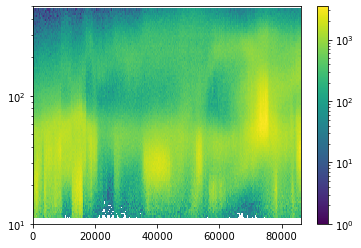

In [26]:
time, dm = np.meshgrid(nc.variables['time'], nc.variables['diameter_mobility'], indexing='ij')
im = plt.pcolormesh(time, dm, nc.variables['dN_dlogDp'], norm=colors.LogNorm(vmin=1, vmax=3500))
plt.yscale('log')
plt.ylim(10, 500)
plt.colorbar(im)
plt.show()

# Setting full Month of May Size distribution

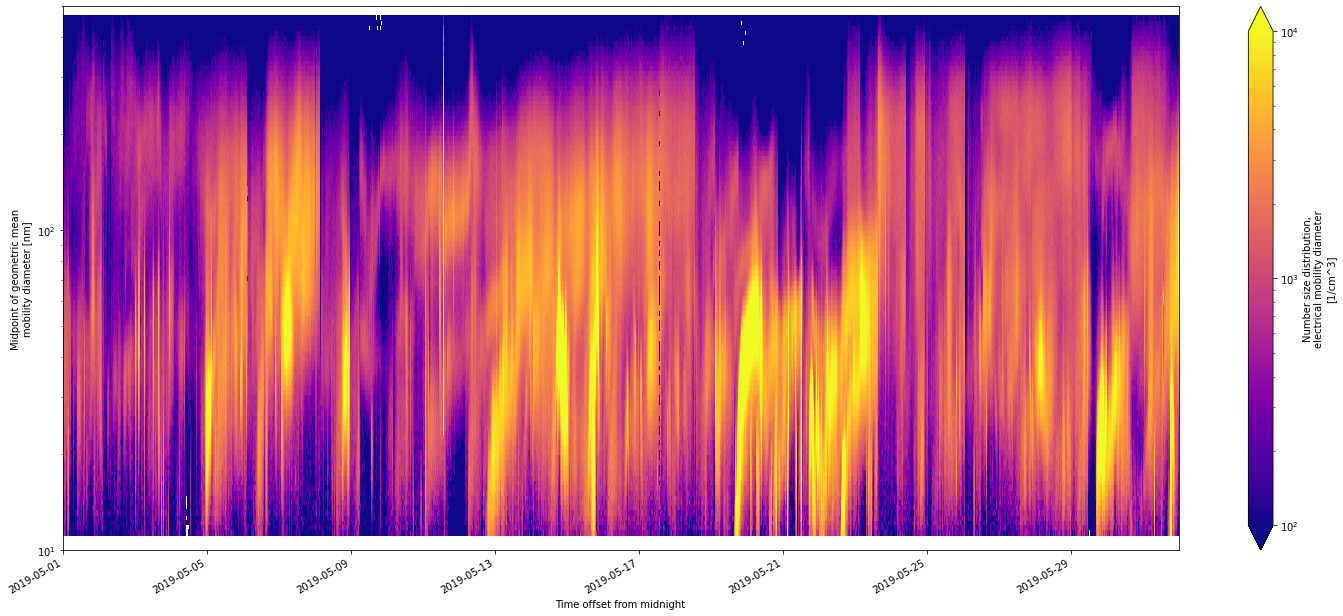

In [46]:


#xr.plot.pcolormesh(darray, x, y, **kwargs)

xr.plot.pcolormesh(dsA2['dN_dlogDp'],'time','diameter_mobility',figsize=(25,10), norm=colors.LogNorm(vmin=100, vmax=10000),  yscale='log', ylim=(10, 500), cmap='plasma')

## Adding Diamters of Size distribution (mean, median, geometric mean)

The Mode on the following is a bit out of contol 

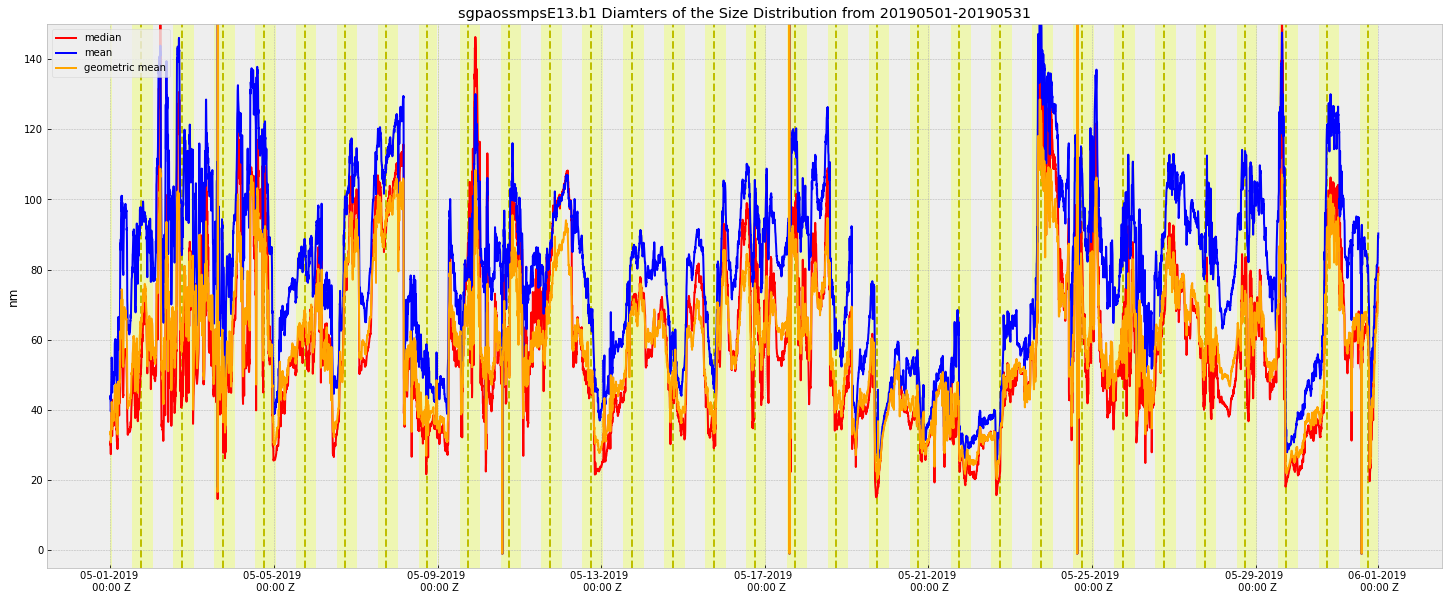

In [8]:
fig,ax = plt.subplots(1,1,figsize=(25,10))
ax.plot(dsA2['time'],dsA2['median'], color = 'red', label='median',zorder=2)
ax.plot(dsA2['time'],dsA2['mean'], color = 'blue', label='mean',zorder=2)
#ax.plot(dsA2['time'],dsA2['mode'], color = 'green', label='mode',zorder=2)
ax.plot(dsA2['time'],dsA2['geometric_mean'], color = 'orange', label='geometric mean',zorder=2)
counter = 1
for i in range(31):
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvline('2019-05-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--', zorder=0)
    counter += 1
ax.set_ylim(-5,150)
ax.set_title("sgpaossmpsE13.b1 Diamters of the Size Distribution from 20190501-20190531")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax.set_ylabel('nm')
ax.legend(loc='upper left')

## Adding sample surface temperature and sample pressure

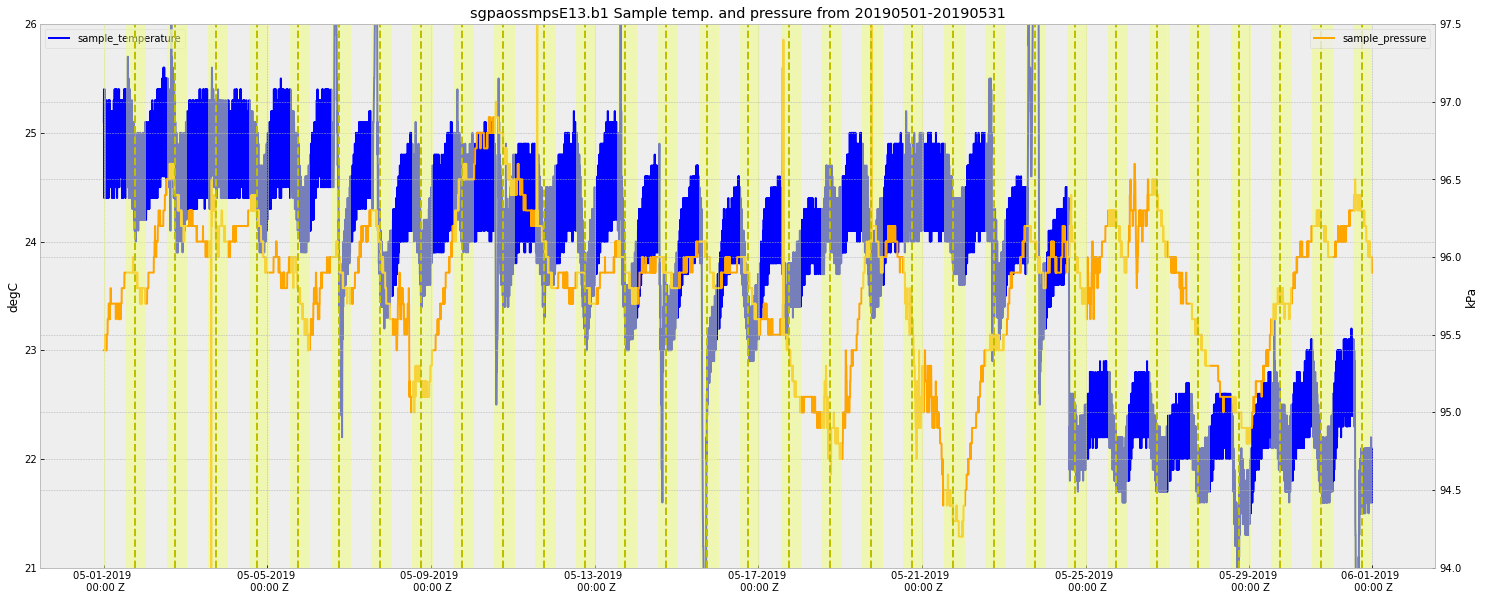

In [11]:
fig,ax1 = plt.subplots(1,1,figsize=(25,10))
ax2 = ax1.twinx()
ax1.plot(dsA2['time'],dsA2['sample_temperature'], color = 'blue', label='sample_temperature',zorder=0)
ax2.plot(dsA2['time'],dsA2['sample_pressure'], color = 'orange', label='sample_pressure',zorder=0)  
counter=1
for i in range(31):
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=1)
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=1)
    plt.axvline('2019-05-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--', zorder=1)
    counter += 1  
ax1.set_ylim(21.0,26.0)
ax2.set_ylim(94.0,97.5)
ax1.set_title("sgpaossmpsE13.b1 Sample temp. and pressure from 20190501-20190531")
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax1.set_ylabel('degC', color='black')
ax2.set_ylabel('kPa', color='black')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Reading in SGP AOSCPCUF from May 2019

In [12]:
dsA3 = xr.concat([xr.open_dataset(f) for f in glob.glob(r"C:\Users\Reese\Desktop\AOS Proj Data\cpcuf\*.nc")], dim='time')
dsA3

<xarray.Dataset>
Dimensions:            (time: 2678015)
Coordinates:
  * time               (time) datetime64[ns] 2019-05-01T00:00:00.690000 ... 2...
Data variables: (12/18)
    base_time          (time) datetime64[ns] 2019-05-01 ... 2019-05-31
    time_offset        (time) datetime64[ns] 2019-05-01T00:00:00.690000 ... 2...
    concentration      (time) float32 1.499e+03 1.521e+03 ... 5.434e+03
    qc_concentration   (time) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    saturation_temp    (time) float32 39.0 39.0 39.0 39.0 ... 39.0 39.0 39.0
    condensation_temp  (time) float32 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0
    ...                 ...
    liquid_level       (time) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    fraction_full      (time) float32 0.6061 0.6063 0.6066 ... 0.6139 0.6139
    corrected_flow     (time) float32 940.5 940.5 940.5 ... 940.5 940.5 940.5
    lat                (time) float32 36.6 36.6 36.6 36.6 ... 36.6 36.6 36.6
    lon                (time) float32 -97.49 -97.49 -97.49 ... -97.49 -97.49
    alt                (time) float32 318.0 318.0 318.0 ... 318.0 318.0 318.0
Attributes: (12/21)
    command_line:                aoscpcufcorr -s sgp -f E13
    Conventions:                 ARM-1.2
    process_version:             ingest-aoscpcufcorr-1.3-0.el7
    dod_version:                 aoscpcuf-b1-4.0
    site_id:                     sgp
    platform_id:                 aoscpcuf
    ...                          ...
    mentor_affiliation:          BNL
    input_datastreams:           sgpaoscpcufE13.a1 : 1.1 : 20190501.000000
    configuration_file:          sgpaoscpcufE13.20190328.160000.config
    AOS_DAC_type:                D
    doi:                         10.5439/1378933
    history:                     created by user dsmgr on machine garnet at 2...

Text(0, 0.5, '1/cm$^{3}$')

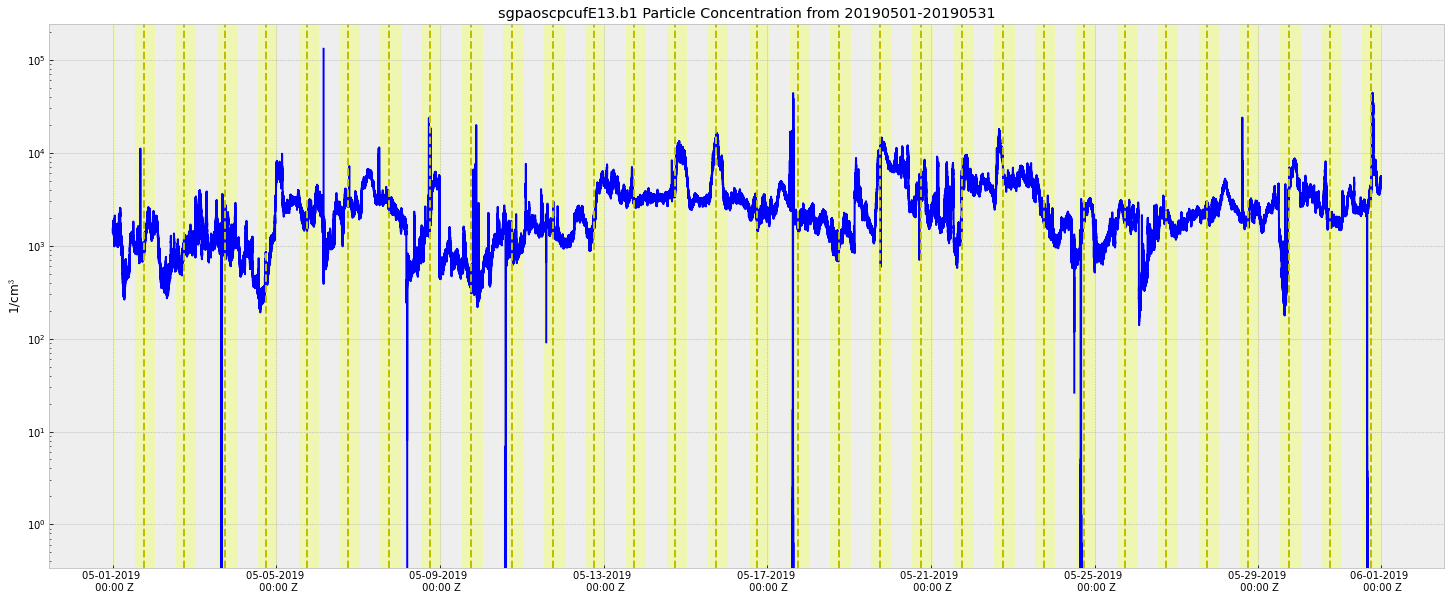

In [13]:
strt_day = 1
fig,ax = plt.subplots(1,1,figsize=(25,10))
ax.plot(dsA3['time'],dsA3['concentration'], color = 'blue', label='concentration',zorder=2)

counter = strt_day
for i in range(31):
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=0)
    plt.axvline('2019-05-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--')
    counter += 1
ax.set_yscale('log')
ax.set_title("sgpaoscpcufE13.b1 Particle Concentration from 20190501-20190531")
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax.set_ylabel('1/cm$^{3}$')

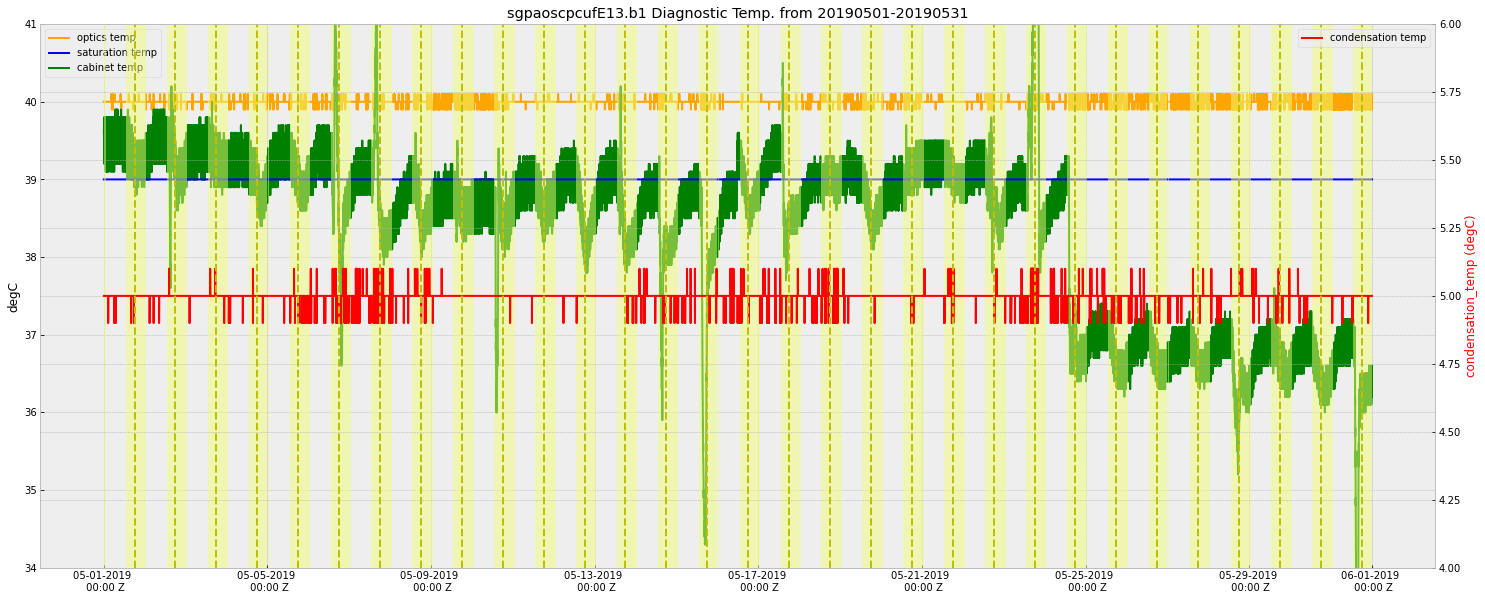

In [16]:
fig,ax1 = plt.subplots(1,1,figsize=(25,10))
ax2 = ax1.twinx()
ax1.plot(dsA3['time'],dsA3['optics_temp'], color = 'orange', label='optics temp',zorder=3)
ax2.plot(dsA3['time'],dsA3['condensation_temp'], color = 'red', label='condensation temp',zorder=2)
ax1.plot(dsA3['time'],dsA3['saturation_temp'], color = 'blue', label='saturation temp',zorder=5)
ax1.plot(dsA3['time'],dsA3['cabinet_temp'], color = 'green', label='cabinet temp',zorder=4)

counter = strt_day
for i in range(31):
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=1)
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=1)
    plt.axvline('2019-05-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--')
    counter += 1

ax1.set_title("sgpaoscpcufE13.b1 Diagnostic Temp. from 20190501-20190531")
ax1.set_ylim(34.0,41.0)
ax2.set_ylim(4.0,6.0)
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax1.set_ylabel('degC', color='black')
ax2.set_ylabel('condensation_temp (degC)', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')



# AOSCCN2COLA

In [8]:
dsA4 = xr.concat([xr.open_dataset(f) for f in glob.glob(r"C:\Users\Reese\Desktop\AOS Proj Data\ccn2cola\*.nc")], dim='time')
dsA4

<xarray.Dataset>
Dimensions:                            (bound: 2, droplet_size: 20, n_lookup: 100, time: 2678385)
Coordinates:
  * time                               (time) datetime64[ns] 2019-05-01 ... 2...
  * droplet_size                       (droplet_size) float32 0.0 1.0 ... 19.0
Dimensions without coordinates: bound, n_lookup
Data variables: (12/42)
    base_time                          (time) datetime64[ns] 2019-05-01 ... 2...
    time_offset                        (time) datetime64[ns] 2019-05-01 ... 2...
    droplet_size_bounds                (time, droplet_size, bound) float32 0....
    eta_lookup_table                   (time, n_lookup, bound) float32 1.0 .....
    seconds_after_transition           (time) float64 164.0 165.0 ... 357.0
    supersaturation_set_point          (time) float32 0.2 0.2 0.2 ... 1.0 1.0
    ...                                 ...
    N_CCN                              (time) float32 66.67 82.7 ... 4.606e+03
    qc_N_CCN                           (time) int32 1536 1536 1536 ... 0 0 0
    N_CCN_dN                           (time, droplet_size) float32 1.0 ... 0.0
    lat                                (time) float32 36.61 36.61 ... 36.61
    lon                                (time) float32 -97.49 -97.49 ... -97.49
    alt                                (time) float32 316.2 316.2 ... 316.2
Attributes: (12/19)
    command_line:             aosccn200corr -s sgp -f E13
    Conventions:              ARM-1.2
    process_version:          ingest-aosccn200corr-2.1-0.el6
    dod_version:              aosccn2cola-b1-2.10
    site_id:                  sgp
    facility_id:              E13
    ...                       ...
    Instrument:               CCN-200
    Instrument_Manufacturer:  Droplet Measurement Technologies
    AOS_DAC_type:             D
    serial_number:            N/A
    doi:                      10.5439/1323892
    history:                  created by user dsmgr on machine ruby at 2019-0...

# CCN bin distribution

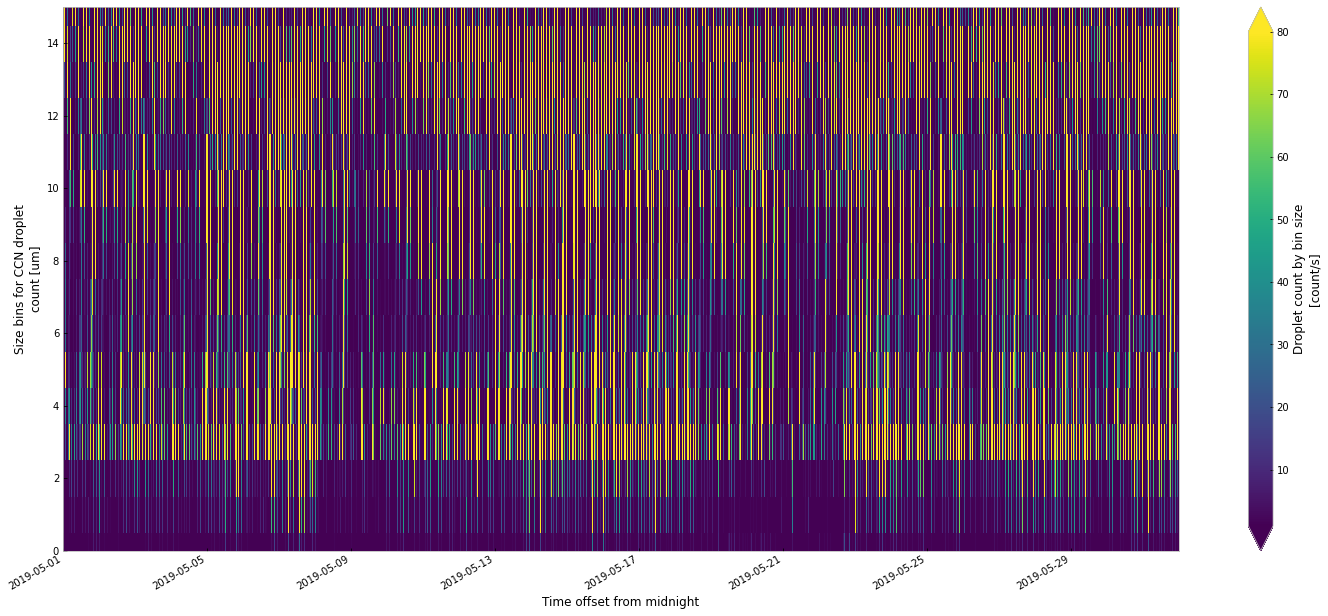

In [60]:
xr.plot.pcolormesh(dsA4['N_CCN_dN'],'time','droplet_size',figsize=(25,10),ylim=(0, 15),vmin=1, vmax=80) #norm=colors.LogNorm(vmin=1, vmax=80)

# Number Concentration

Text(0, 0.5, 'Number concentration CCN 1/cm$^{3}$')

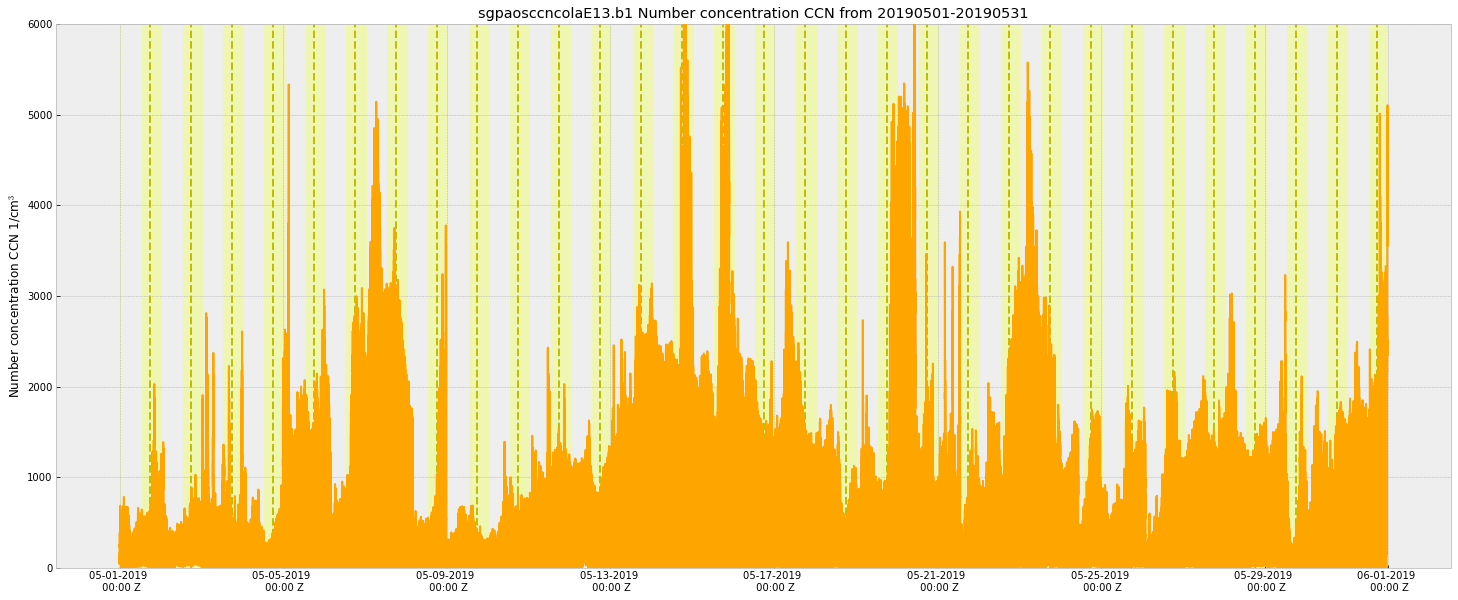

In [59]:
strt_day=1
plt.style.use("bmh")
fig,ax1 = plt.subplots(1,1,figsize=(25,10))
ax1.plot(dsA4['time'],dsA4['N_CCN'], color = 'orange', label='# CCN',zorder=3)
counter = strt_day
for i in range(31):
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=1)
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=1)
    plt.axvline('2019-05-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--')
    counter += 1
ax1.set_ylim(0,6000.0)
ax1.set_title("sgpaosccncolaE13.b1 Number concentration CCN from 20190501-20190531")
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax1.set_ylabel('Number concentration CCN 1/cm$^{3}$', color='black')

# Column Temperature Plot

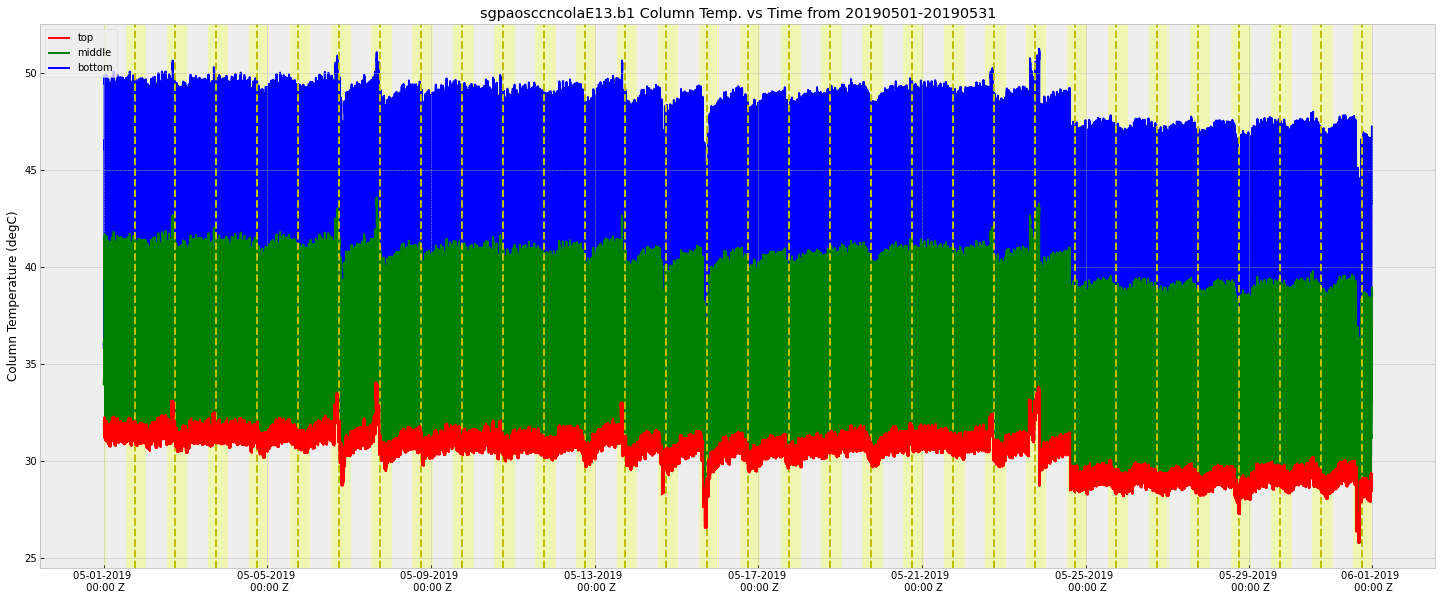

In [5]:
strt_day=1
plt.style.use("bmh")
fig,ax1 = plt.subplots(1,1,figsize=(25,10))
ax1.plot(dsA4['time'],dsA4['T_read_TEC1'], color = 'red', label='top',zorder=3)
ax1.plot(dsA4['time'],dsA4['T_read_TEC2'], color = 'green', label='middle',zorder=2)
ax1.plot(dsA4['time'],dsA4['T_read_TEC3'], color = 'blue', label='bottom',zorder=1)
counter = strt_day
for i in range(31):
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=1)
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=1)
    plt.axvline('2019-05-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--')
    counter += 1
ax1.set_title("sgpaosccncolaE13.b1 Column Temp. vs Time from 20190501-20190531")
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax1.set_ylabel('Column Temperature (degC)', color='black')
ax1.legend(loc = 'upper left')

# Sample Pressure Plot

Text(0, 0.5, 'Sample Pressure (hPa)')

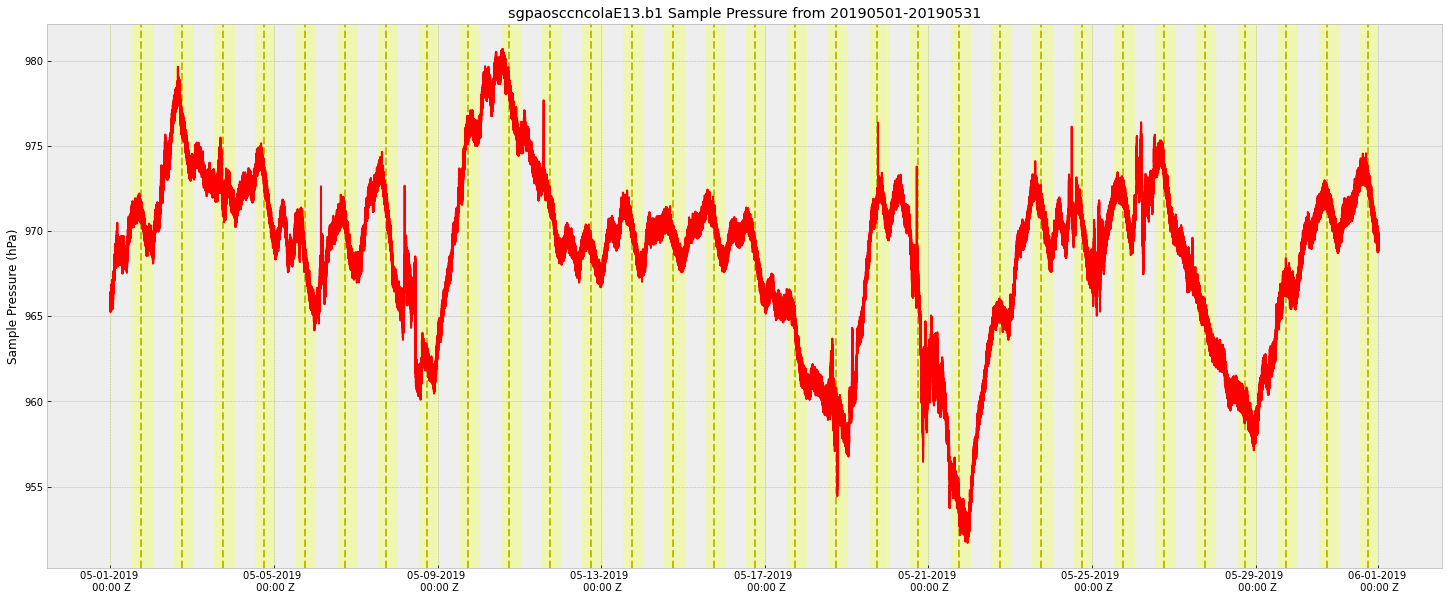

In [7]:
strt_day=1
plt.style.use("bmh")
fig,ax1 = plt.subplots(1,1,figsize=(25,10))
ax1.plot(dsA4['time'],dsA4['P_sample'], color = 'red', label='top',zorder=3)
counter = strt_day
for i in range(31):
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=1)
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=1)
    plt.axvline('2019-05-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--')
    counter += 1
ax1.set_title("sgpaosccncolaE13.b1 Sample Pressure from 20190501-20190531")
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax1.set_ylabel('Sample Pressure (hPa)', color='black')

# Adding Diagnostic Temp Plot

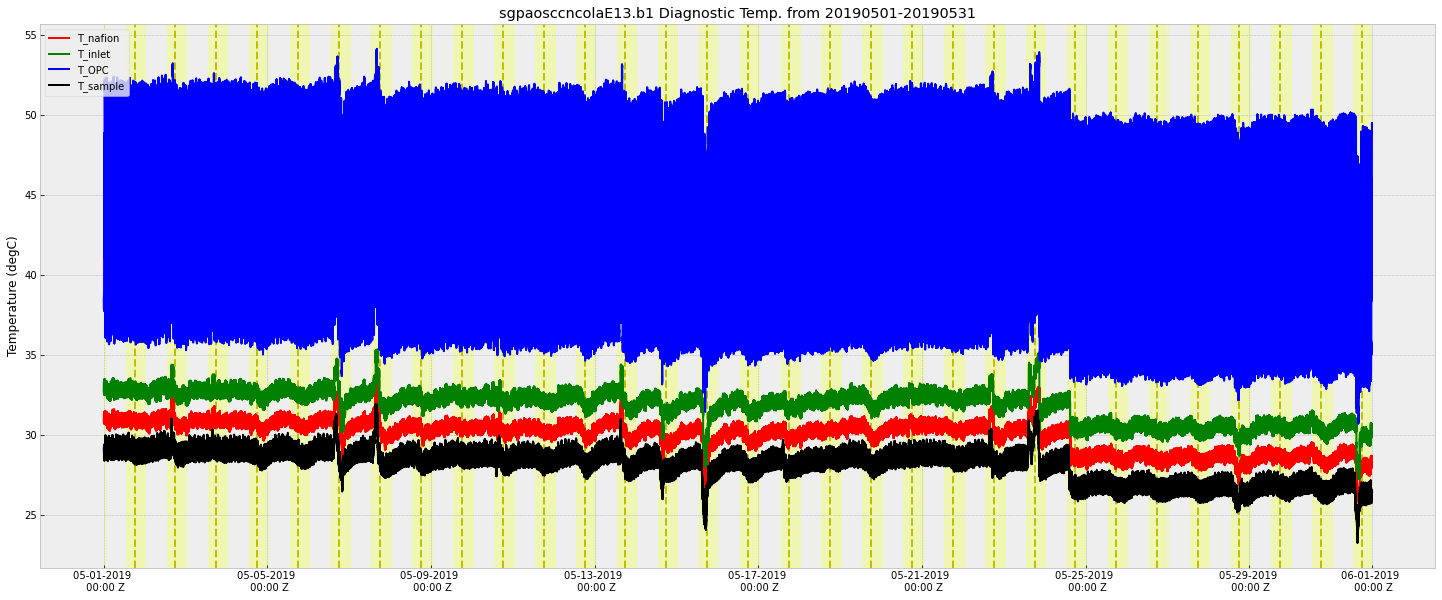

In [14]:
strt_day=1
plt.style.use("bmh")
fig,ax1 = plt.subplots(1,1,figsize=(25,10))
ax1.plot(dsA4['time'],dsA4['T_nafion'], color = 'red', label='T_nafion',zorder=3)
ax1.plot(dsA4['time'],dsA4['T_inlet'], color = 'green', label='T_inlet',zorder=3)
ax1.plot(dsA4['time'],dsA4['T_OPC'], color = 'blue', label='T_OPC',zorder=3)
ax1.plot(dsA4['time'],dsA4['T_sample'], color = 'black', label='T_sample',zorder=3)
counter = strt_day
for i in range(31):
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T00:00:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T00:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=1)
    plt.axvspan('2019-05-'+'{:0>2}'.format(counter)+'T12:59:30.000000000','2019-05-'+'{:0>2}'.format(counter)+'T23:59:30.000000000', facecolor='#efff77', alpha=0.5, zorder=1)
    plt.axvline('2019-05-'+'{:0>2}'.format(counter)+'T17:59:30.000000000', color='y', linestyle='--')
    counter += 1
ax1.set_title("sgpaosccncolaE13.b1 Diagnostic Temp. from 20190501-20190531")
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d-%Y \n %H:%M Z'))
ax1.set_ylabel('Temperature (degC)', color='black')
ax1.legend(loc = 'upper left')